# Algorithm Design Manual

## Chapter 2: Algorithm Analysis

In [18]:
from math import log2, factorial, ceil
import matplotlib.pyplot as plt
import numpy as np

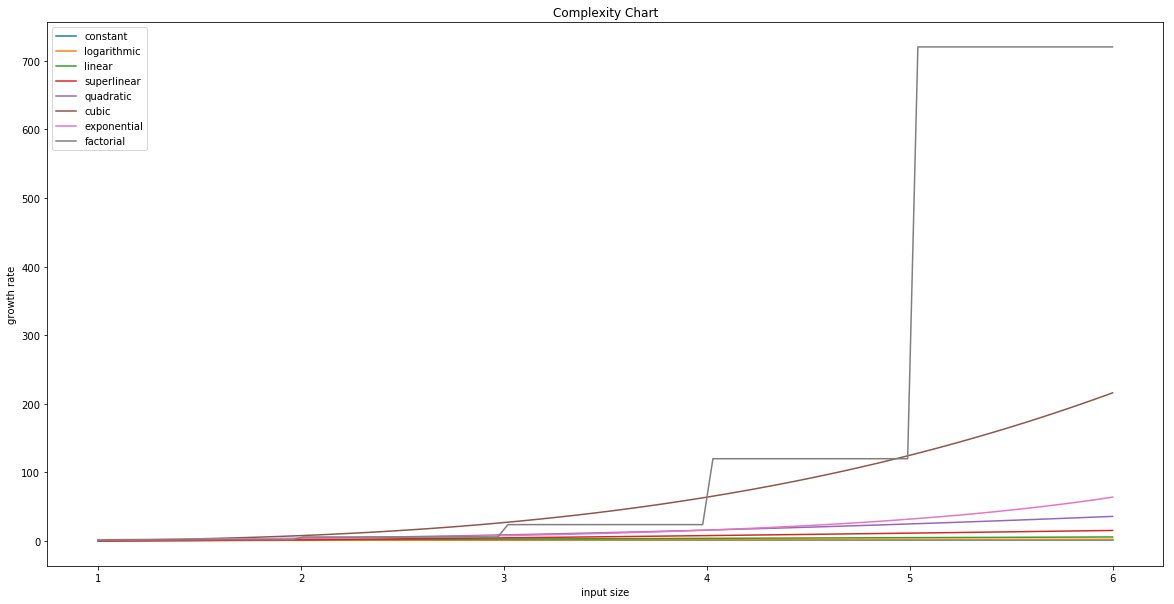

In [19]:
x = np.linspace(1, 6, 100) # returns evenly spaced numbers over the specified interval: start, end, num_intervals

plt.figure(figsize=(20,10))
plt.plot(x, x//x, label='constant')
plt.plot(x, np.array([log2(xi) for xi in x]), label='logarithmic')
plt.plot(x, x, label='linear')
plt.plot(x, np.array([xi*log2(xi) for xi in x]), label='superlinear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.plot(x, 2**x, label='exponential')

factorialx = np.array([factorial(ceil(xi)) for xi in x])
plt.plot(x, factorialx, label='factorial') # only works for whole numbers!

plt.xlabel('input size')
plt.ylabel('growth rate')

plt.title("Complexity Chart")

plt.legend()

plt.show()

##### 2-1. [3] What value is returned by the following function? Express your answer as a function of n. Give the worst-case running time using the Big Oh notation.
```
function mystery(n)
    r := 0
    for i := 1 to n − 1 do 
        for j := i + 1 to n do 
            for k := 1 to j do
                r := r + 1 
    return(r)
```

```
function pesky(n) 
    r := 0
    for i := 1 to n do 
        for j := 1 to i do
            for k := j to i + j do 
                r := r + 1
    return(r)
```

```
function prestiferous(n) 
    r := 0
    for i := 1 to n do 
        for j := 1 to i do
            for k := j to i + j do
                for l := 1 to i + j − k do
                    r := r + 1 
    return(r)
```

```
function conundrum(n) 
    r := 0
    for i := 1 to n do
        for j := i + 1 to n do
            for k := i + j − 1 to n do 
                r := r + 1
    return(r)
```

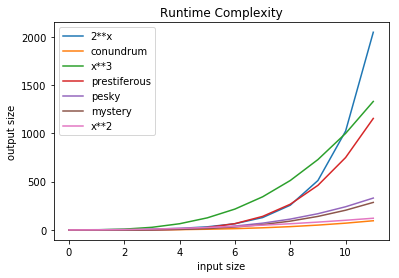

In [20]:
NUM_INPUTS = 12

def mystery(n):
    r = 0
    for i in range(1, n-1): 
        for j in range(i + 1, n):
            for k in range(1,j):
                r = r + 1
    return r

def pesky(n):
    r = 0
    for i in range(1,n): 
        for j in range(1,i):
            for k in range(j, i+j):
                r = r + 1
    return r

def prestiferous(n):
    r = 0
    for i in range(1,n): 
        for j in range(1,i):
            for k in range(j,i+j):
                for l in range(1,i+j-k):
                    r = r + 1
    return r

def conundrum(n):
    r = 0
    for i in range(1,n):
        for j in range(i+1,n):
            for k in range(i+j-1,n): 
                r = r + 1
    return r

exponential = [2**x for x in range(NUM_INPUTS)]
plt.plot(exponential, label='2**x')

conundrums = [conundrum(x) for x in range(NUM_INPUTS)]
plt.plot(conundrums, label='conundrum')

cubic = [x**3 for x in range(NUM_INPUTS)]
plt.plot(cubic, label='x**3')

prestiferouses = [prestiferous(i) for i in range(NUM_INPUTS)]
plt.plot(prestiferouses, label='prestiferous')

peskies = [pesky(i) for i in range(NUM_INPUTS)]
plt.plot(peskies, label='pesky')

mysteries = [mystery(i) for i in range(NUM_INPUTS)]
plt.plot(mysteries, label='mystery')

quadratic = [x**2 for x in range(NUM_INPUTS)]
plt.plot(quadratic, label='x**2')

plt.xlabel('input size')
plt.ylabel('output size')
plt.title("Runtime Complexity")
plt.legend()
plt.show()

##### 2-5. [5] Suppose the following algorithm is used to evaluate the polynomial $p(x) = a_nx^n +a_{n−1}x^{n−1} +...+a_1x+a_0$

```
p := a0;
xpower := 1;
for i := 1 to n do
    xpower := x ∗ xpower;
    p := p+ai ∗xpower end
```

*(a) How many multiplications are done in the worst-case? How many additions?*

In [23]:
def evaluatePolynomial(a):
    p = a[0]
    xpower = 1
    for i in range(1,n):
        xpower = x * xpower
        p = p + a[i] * xpower
    return p

evaluatePolynomial([3, 2, 1])

array([  5.        ,   5.1010101 ,   5.2020202 ,   5.3030303 ,
         5.4040404 ,   5.50505051,   5.60606061,   5.70707071,
         5.80808081,   5.90909091,   6.01010101,   6.11111111,
         6.21212121,   6.31313131,   6.41414141,   6.51515152,
         6.61616162,   6.71717172,   6.81818182,   6.91919192,
         7.02020202,   7.12121212,   7.22222222,   7.32323232,
         7.42424242,   7.52525253,   7.62626263,   7.72727273,
         7.82828283,   7.92929293,   8.03030303,   8.13131313,
         8.23232323,   8.33333333,   8.43434343,   8.53535354,
         8.63636364,   8.73737374,   8.83838384,   8.93939394,
         9.04040404,   9.14141414,   9.24242424,   9.34343434,
         9.44444444,   9.54545455,   9.64646465,   9.74747475,
         9.84848485,   9.94949495,  10.05050505,  10.15151515,
        10.25252525,  10.35353535,  10.45454545,  10.55555556,
        10.65656566,  10.75757576,  10.85858586,  10.95959596,
        11.06060606,  11.16161616,  11.26262626,  11.36

*(b) How many multiplications are done on the average?*


*(c) Can you improve this algorithm?*